In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

from dnn_utils import sigmoid, sigmoid_backward, relu, relu_backward


%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(1)

import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *
from public_tests import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [2]:
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   


(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


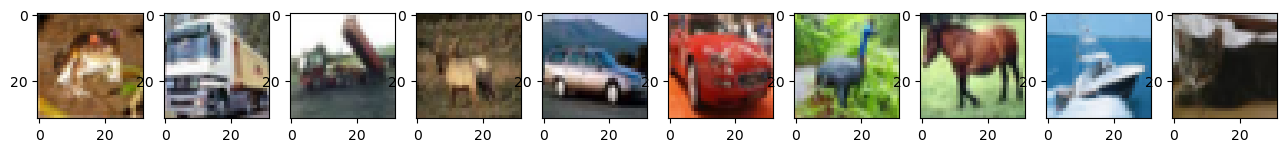

In [3]:
import matplotlib.pyplot as plt

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:10]]))

f, axarr = plt.subplots(1, 10)
f.set_size_inches(16, 6)

for i in range(10):
    img = X_train[i]
    axarr[i].imshow(img)
plt.show()

In [4]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:

m_train = X_train.shape[0]
m_test = y_train.shape[0]
num_px = X_train.shape[1]



print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

Number of training examples: m_train = 50000
Number of testing examples: m_test = 50000
Height/Width of each image: num_px = 32
Each image is of size: (32, 32, 3)
train_set_x shape: (50000, 32, 32, 3)
train_set_y shape: (50000, 1)
test_set_x shape: (10000, 32, 32, 3)
test_set_y shape: (10000, 1)


In [6]:
# Reshape the training and test examples 
train_x_flatten = X_train.reshape(X_train.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = X_test.reshape(X_test.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (3072, 50000)
test_x's shape: (3072, 10000)


In [7]:
train_x

array([[0.23137255, 0.60392157, 1.        , ..., 0.1372549 , 0.74117647,
        0.89803922],
       [0.24313725, 0.69411765, 1.        , ..., 0.69803922, 0.82745098,
        0.89803922],
       [0.24705882, 0.73333333, 1.        , ..., 0.92156863, 0.94117647,
        0.9372549 ],
       ...,
       [0.48235294, 0.56078431, 0.31372549, ..., 0.04705882, 0.76470588,
        0.63921569],
       [0.36078431, 0.52156863, 0.3372549 , ..., 0.12156863, 0.74509804,
        0.63921569],
       [0.28235294, 0.56470588, 0.32941176, ..., 0.19607843, 0.67058824,
        0.63137255]])

In [8]:

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):

        parameters["W" + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters["b" + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l - 1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [9]:
parameters = initialize_parameters_deep([5,4,3])

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))


W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.]
 [0.]
 [0.]]


In [10]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    Z= np.dot(W,A) + b

    cache = (A, W, b)
    
    return Z, cache

In [11]:
# GRADED FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        #(≈ 2 lines of code)
        # Z, linear_cache = ...
        # A, activation_cache = ...
        # YOUR CODE STARTS HERE
        Z, linear_cache = linear_forward (A_prev,W,b)
        A, activation_cache = sigmoid(Z)
        # YOUR CODE ENDS HERE
    
    elif activation == "relu":
        #(≈ 2 lines of code)
        # Z, linear_cache = ...
        # A, activation_cache = ...
        # YOUR CODE STARTS HERE
        Z, linear_cache = linear_forward (A_prev,W,b)
        A, activation_cache = relu(Z)
        # YOUR CODE ENDS HERE
    cache = (linear_cache, activation_cache)

    return A, cache

In [12]:

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- activation value from the output (last) layer
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    for l in range(1, L):
        A_prev = A 

        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)

    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.

    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    

          
    return AL, caches

In [13]:
# GRADED FUNCTION: compute_cost

def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    # (≈ 1 lines of code)
    # cost = ...
    # YOUR CODE STARTS HERE
    cost= -1/m * (np.dot(Y,np.log(AL.T))+np.dot(1-Y,np.log(1-AL).T))
    
    # YOUR CODE ENDS HERE
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).

    
    return cost

In [14]:
A = np.array([[1, 2], [3, 4]])

print('axis=1 and keepdims=True')
print(np.sum(A, axis=1, keepdims=True))
print('axis=1 and keepdims=False')
print(np.sum(A, axis=1, keepdims=False))
print('axis=0 and keepdims=True')
print(np.sum(A, axis=0, keepdims=True))
print('axis=0 and keepdims=False')
print(np.sum(A, axis=0, keepdims=False))

axis=1 and keepdims=True
[[3]
 [7]]
axis=1 and keepdims=False
[3 7]
axis=0 and keepdims=True
[[4 6]]
axis=0 and keepdims=False
[4 6]


In [15]:
# GRADED FUNCTION: linear_backward

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    ### START CODE HERE ### (≈ 3 lines of code)
    # dW = ...
    # db = ... sum by the rows of dZ with keepdims=True
    # dA_prev = ...
    # YOUR CODE STARTS HERE
    dW= 1/m * np.dot(dZ,A_prev.T)
    db = 1/m * np.sum(dZ, axis = 1 , keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    # YOUR CODE ENDS HERE
    
    return dA_prev, dW, db

In [16]:
# GRADED FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        #(≈ 2 lines of code)
        # dZ =  ...
        # dA_prev, dW, db =  ...
        # YOUR CODE STARTS HERE
        dZ = relu_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
        
        # YOUR CODE ENDS HERE
        
    elif activation == "sigmoid":
        #(≈ 2 lines of code)
        # dZ =  ...
        # dA_prev, dW, db =  ...
        # YOUR CODE STARTS HERE
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
        # YOUR CODE ENDS HERE
    
    return dA_prev, dW, db

In [17]:
# GRADED FUNCTION: L_model_backward

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    #(1 line of code)
    # dAL = ...
    # YOUR CODE STARTS HERE
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # YOUR CODE ENDS HERE
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    #(approx. 5 lines)
    # current_cache = ...
    # dA_prev_temp, dW_temp, db_temp = ...
    # grads["dA" + str(L-1)] = ...
    # grads["dW" + str(L)] = ...
    # grads["db" + str(L)] = ...
    # YOUR CODE STARTS HERE
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    # YOUR CODE ENDS HERE
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        #(approx. 5 lines)
        # current_cache = ...
        # dA_prev_temp, dW_temp, db_temp = ...
        # grads["dA" + str(l)] = ...
        # grads["dW" + str(l + 1)] = ...
        # grads["db" + str(l + 1)] = ...
        # YOUR CODE STARTS HERE
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        # YOUR CODE ENDS HERE

    return grads

In [18]:
# GRADED FUNCTION: update_parameters

def update_parameters(params, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    params -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    parameters = params.copy()
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    #(≈ 2 lines of code)
    for l in range(L):
        # parameters["W" + str(l+1)] = ...
        # parameters["b" + str(l+1)] = ...
        # YOUR CODE STARTS HERE
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW"+ str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db"+ str(l+1)]
        # YOUR CODE ENDS HERE
    return parameters

In [19]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 3072     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)
learning_rate = 0.0075

In [20]:
# GRADED FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented

    parameters = initialize_parameters(n_x, n_h, n_y)

    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".

        A1, cache1 = linear_activation_forward(X, W1, b1, activation = "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation = "sigmoid")
        # YOUR CODE ENDS HERE
        
        # Compute cost
        #(≈ 1 line of code)
        # cost = ...
        # YOUR CODE STARTS HERE
        cost = compute_cost(A2, Y)
        
        # YOUR CODE ENDS HERE
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".

        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation = "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation = "relu")

        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        #(approx. 1 line of code)
        # parameters = ...
        # YOUR CODE STARTS HERE
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # YOUR CODE ENDS HERE

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)

    return parameters, costs

def plot_costs(costs, learning_rate=0.0075):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

In [21]:
train_x.shape

(3072, 50000)

In [22]:
y_train[y_train != 1] = 0

In [23]:
y_test[y_test != 1] = 0

In [24]:
y_train_set = y_train.reshape(1,50000)
y_test_set = y_test.reshape(1,10000)

In [25]:
parameters, costs = two_layer_model(train_x, y_train_set, layers_dims = (n_x, n_h, n_y), num_iterations = 2, print_cost=False)

print("Cost after first iteration: " + str(costs[0]))

two_layer_model_test(two_layer_model)

Cost after iteration 1: 0.6895071160709483
Cost after first iteration: 0.6911746745875484
Cost after iteration 1: 0.6915746967050506
Cost after iteration 1: 0.6915746967050506
Cost after iteration 1: 0.6915746967050506
Cost after iteration 2: 0.6524135179683451
 All tests passed.


Cost after iteration 0: 0.6911746745875484
Cost after iteration 100: 0.32992018888540986
Cost after iteration 200: 0.32581413659938513
Cost after iteration 300: 0.3219548636123067
Cost after iteration 400: 0.3181374590927188
Cost after iteration 500: 0.3142893669631478
Cost after iteration 600: 0.31039642288566194
Cost after iteration 700: 0.3064800311845874
Cost after iteration 800: 0.30257343832085964
Cost after iteration 900: 0.29870542856614746
Cost after iteration 1000: 0.294894761333664
Cost after iteration 1100: 0.2911836464718227
Cost after iteration 1200: 0.2876606456354746
Cost after iteration 1300: 0.28436329151789463
Cost after iteration 1400: 0.28136886163115155
Cost after iteration 1500: 0.27871576260633785
Cost after iteration 1600: 0.27639913428001456
Cost after iteration 1700: 0.27440377320675646
Cost after iteration 1800: 0.27266831877868486
Cost after iteration 1900: 0.27115863304477655
Cost after iteration 2000: 0.26980972782073115
Cost after iteration 2100: 0.26860

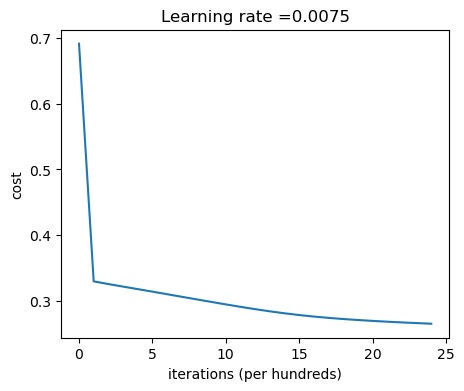

In [26]:
parameters, costs = two_layer_model(train_x, y_train_set, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)
plot_costs(costs, learning_rate)

In [27]:
predictions_train = predict(train_x, y_train_set, parameters)

Accuracy: 0.90004


In [28]:
predictions_test = predict(test_x, y_test_set, parameters)

Accuracy: 0.9000000000000004


In [34]:
### CONSTANTS ###
layers_dims = [3072, 20, 7, 5, 1] #  4-layer model

In [35]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    #(≈ 1 line of code)
    # parameters = ...
    # YOUR CODE STARTS HERE
    parameters = initialize_parameters_deep(layers_dims)
    
    # YOUR CODE ENDS HERE
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        #(≈ 1 line of code)
        # AL, caches = ...
        # YOUR CODE STARTS HERE
        AL, caches = L_model_forward(X, parameters)
        
        # YOUR CODE ENDS HERE
        
        # Compute cost.
        #(≈ 1 line of code)
        # cost = ...
        # YOUR CODE STARTS HERE
        cost = compute_cost(AL, Y)
        
        # YOUR CODE ENDS HERE
    
        # Backward propagation.
        #(≈ 1 line of code)
        # grads = ...    
        # YOUR CODE STARTS HERE
        grads = L_model_backward(AL, Y, caches)
        
        # YOUR CODE ENDS HERE
 
        # Update parameters.
        #(≈ 1 line of code)
        # parameters = ...
        # YOUR CODE STARTS HERE
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # YOUR CODE ENDS HERE
                
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

In [38]:
parameters, costs = L_layer_model(train_x, y_set_train, layers_dims, num_iterations = 1, print_cost = False)

print("Cost after first iteration: " + str(costs[0]))



Cost after iteration 0: 0.6931479564648371
Cost after first iteration: 0.6931479564648371


In [40]:
parameters, costs = L_layer_model(train_x, y_set_train, layers_dims, num_iterations = 2500, print_cost = True)

Cost after iteration 0: 0.6931479564648371
Cost after iteration 100: 0.5929461498851679
Cost after iteration 200: 0.5236000219825007
Cost after iteration 300: 0.4748775832411863
Cost after iteration 400: 0.4399976185255229
Cost after iteration 500: 0.41454243352215747
Cost after iteration 600: 0.39562392981079136
Cost after iteration 700: 0.3813282648415007
Cost after iteration 800: 0.37036439219481476
Cost after iteration 900: 0.3618445770209708
Cost after iteration 1000: 0.3551467536211369
Cost after iteration 1100: 0.34982711883184675
Cost after iteration 1200: 0.345563713718977
Cost after iteration 1300: 0.3421193564026848
Cost after iteration 1400: 0.33931684957535724
Cost after iteration 1500: 0.3370221073864036
Cost after iteration 1600: 0.33513248041693394
Cost after iteration 1700: 0.33356855050477874
Cost after iteration 1800: 0.33226827952735905
Cost after iteration 1900: 0.33118277979601046
Cost after iteration 2000: 0.33027321782344676
Cost after iteration 2100: 0.32950852

In [43]:
pred_train = predict(train_x, y_set_train, parameters)

Accuracy: 0.9


In [42]:
pred_test = predict(test_x, y_set_test, parameters)

Accuracy: 0.9000000000000004


Accuracy: 0.0
This is not a Automobile


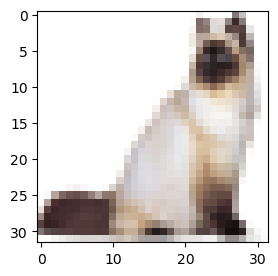

In [52]:
## START CODE HERE ##
my_image = "my_image.jpg" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)
## END CODE HERE ##
plt.figure(figsize=(5,3))
fname = "images/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T


my_predicted_image = predict(image, my_label_y, parameters)
Automobile = 'Automobile' if 1 in my_predicted_image[0] else 'not a Automobile'
print("This is" + ' ' + Automobile)



Bibliography:
- http://home.mit.bme.hu/~hadhazi/Oktatas/NN18/dem3/html_demo/CIFAR-10Demo.html
- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
- https://stats.stackexchange.com/questions/211436/why-do-we-normalize-images-by-subtracting-the-datasets-image-mean-and-not-the-c